# Pymaceuticals Inc.
---

### Observations and Insights
- Total number of measurements taken on each drug regimen ranged ~ 150 - 240. 
- Pretty equal distribution of female (49%) versus male (51%) mice.
- On the mice tested, Capomulin & Ramicane had the higher tumor volume compared to other drugs.
- For Capomulin drug regimen, the average tumor volume increased with increased mouse weight.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np
import random

import operator   # needed to make sort work

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# keep orginal data and make a copy
mm_df = mouse_metadata
sr_df = study_results

In [5]:
# Merge our two data frames together
combo_df = pd.merge(mm_df, sr_df, on="Mouse ID")
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# clean the data but keep original combo_df file

combined_df = combo_df.dropna(how="any")
combined_df

# ** NOTE:  Going fwd use combined_df as the dataframe to use for calculations, etc.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice.

num_mice = len(pd.unique(mm_df["Mouse ID"]))
print('Numnber of mice: ', num_mice)

Numnber of mice:  249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#   ** Note:  Mouse result should be:  array(['g989'], dtype=object)
# Optional: Get all the data for the duplicate mouse ID. 

# Selecting duplicate rows except first  

# occurrence based on all columns 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'], keep=False)] 
  
print("Duplicate Row(s) :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Row(s) :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Checking the number of mice in the clean DataFrame.

# remove duplicates
clean_df=combined_df[combined_df['Mouse ID'] != 'g989']
clean_df['Mouse ID'].nunique()

num_mice = len(pd.unique(clean_df["Mouse ID"]))
print('Numnber of mice after removal of duplicate: ', num_mice)
print()

Numnber of mice after removal of duplicate:  248



In [10]:
# Display the 'cleaned' dataframe
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
num_drug_regimen = len(pd.unique(clean_df["Drug Regimen"]))
print('Numnber of Drug Regimen: ', num_drug_regimen)
print()

Numnber of Drug Regimen:  10



## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 
                                                            ['mean', 'median', 'var','std', 'sem']})
                                          
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#### NOTE:  USE clean_df 

In [13]:
num_drug_regimen = len(pd.unique(clean_df["Drug Regimen"]))
print('Number of Drug Regimen: ', num_drug_regimen)
print()

drugs = pd.unique(clean_df["Drug Regimen"])
drugs

Number of Drug Regimen:  10



array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [14]:
drugs = pd.unique(clean_df["Drug Regimen"])
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [15]:
#for reference only
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [16]:
# -- for reference only -- to be used for charts below

summary_stats_df = summary_stats_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})  
summary_stats_df

new_df = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
new_df.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [17]:
# total number of measurements per drug
grp_by_drug_measurement = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'count'})
grp_by_drug_measurement

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


#### The following cells will be used for chart references below:

In [18]:
drugs = pd.unique(clean_df["Drug Regimen"])
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [19]:
# measurements sorted by Drug Regimen
measurements = grp_by_drug_measurement['Tumor Volume (mm3)']
measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [20]:
#sort by Tumor Volume (mm3) in descending order
type(measurements)
measurements = measurements.sort_values(ascending=False)
measurements

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Tumor Volume (mm3), dtype: int64

## BAR chart using PANDAS

<function matplotlib.pyplot.close(fig=None)>

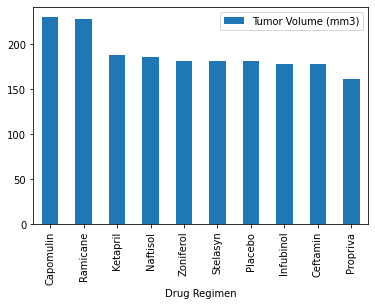

In [21]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using PANDAS.
measurements.plot(kind="bar")

plt.legend()
plt.close

## BAR chart using PYPLOT

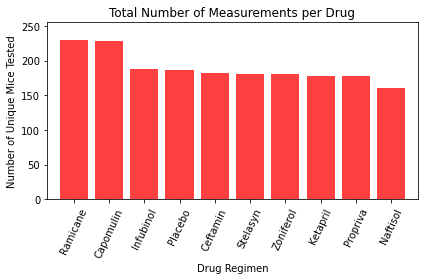

<function matplotlib.pyplot.close(fig=None)>

In [22]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using PYPLOT.

#%matplotlib notebook

# NOTE: use variables above for the charts
# x-axis will be drugs --> variable: drugs
# y-axis will be # of measurements taken per drug regimen --> variable: measurements

x_axis = np.arange(0, len(measurements))

# Tell matplotlib that chart to be created is a bar chart
# Apply align="edge" to ensure the bars line up with the tick marks
plt.bar(x_axis, measurements, facecolor="red", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
#plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xticks(tick_locations, drugs, rotation=65)

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(measurements)+25, +50)

# Set a Title and labels
plt.title("Total Number of Measurements per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")
plt.show()

plt.close

####  Generate a pie plot showing the distribution of female versus male mice using PANDAS.

In [23]:
# count number of male, female mice 

mice_df = mm_df.groupby('Sex').agg({'Sex': 'count'})  

# rename column
ren_mice_df = mice_df.rename(columns={'Sex': 'Count'})                      
ren_mice_df

,Count
Sex,
Female,124
Male,125


In [24]:
# Display mouse count by sex -- using loc 

num_female = mice_df.loc['Female', 'Sex']
num_male = mice_df.loc['Male', 'Sex']

print("Female: ", num_female, "  Male: ", num_male)

Female:  124   Male:  125


# PIE chart using PANDAS

<function matplotlib.pyplot.close(fig=None)>

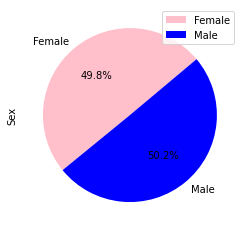

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS.

mice_df.plot(kind="pie", subplots = True, figsize = (4, 4), 
             colors = ["pink", "blue"], autopct="%1.1f%%", startangle=40)

plt.close

# PIE chart using PYPLOT

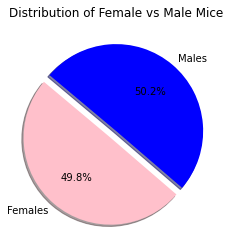

<function matplotlib.pyplot.close(fig=None)>

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The values of each section of the pie chart  -- use the variables for count of mice: female & male
sizes = [num_female, num_male]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Females" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

# Set a Title and labels
plt.title("Distribution of Female vs Male Mice")

#plt.legend()

plt.show()
plt.close

for ref only
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend

## Quartiles, Outliers and Boxplots

#### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#### Capomulin, Ramicane, Infubinol, and Ceftamin
#### Start by getting the last (greatest) timepoint for each mouse
#### Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [27]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [28]:
# sort the clean_df by timepoint (descending)
sorted_clean_df = clean_df.sort_values(['Timepoint'], ascending=False)
sorted_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
874,g296,Zoniferol,Female,14,29,45,68.163195,4
884,g497,Ketapril,Male,19,28,45,69.872251,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1170,m269,Stelasyn,Female,22,28,0,45.000000,0
1164,m133,Naftisol,Female,2,26,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
1153,l733,Ceftamin,Female,4,30,0,45.000000,0


Expected results:

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346

Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


#### Calculate the IQR and quantitatively determine if there are any potential outliers for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [29]:
# create subset dataframe for drugs: "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
subset_df = sorted_clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
subset1_df = subset_df[subset_df['Drug Regimen'].isin (["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
subset1_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
360,g316,Capomulin,45,40.159220
124,y793,Capomulin,45,31.896238
1855,y865,Ceftamin,45,64.729837
350,v923,Capomulin,45,40.658124
1379,p438,Ceftamin,45,61.433892
...,...,...,...,...
1305,o809,Infubinol,0,45.000000
1251,o287,Ceftamin,0,45.000000
1219,n671,Infubinol,0,45.000000
1204,m756,Infubinol,0,45.000000


In [30]:
# Capomulin subset
Capomulin_df = subset1_df[subset1_df['Drug Regimen'] == "Capomulin"]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
360,g316,Capomulin,45,40.159220
124,y793,Capomulin,45,31.896238
350,v923,Capomulin,45,40.658124
134,r554,Capomulin,45,32.377357
337,j119,Capomulin,45,38.125164


In [31]:
Capomulin_tum_vol=Capomulin_df['Tumor Volume (mm3)']
Capomulin_tum_vol

360     40.159220
124     31.896238
350     40.658124
134     32.377357
337     38.125164
          ...    
310     45.000000
300     45.000000
290     45.000000
273     45.000000
1452    45.000000
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [32]:
# Ramicane subset
Ramicane_df = subset1_df[subset1_df['Drug Regimen'] == "Ramicane"]
Ramicane_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
327,a411,Ramicane,45,38.407618
114,n364,Ramicane,45,31.095335
410,u196,Ramicane,45,40.667713
400,e662,Ramicane,45,40.659006
94,j913,Ramicane,45,31.560470


In [33]:
Ramicane_tum_vol=Ramicane_df['Tumor Volume (mm3)']
Ramicane_tum_vol

327    38.407618
114    31.095335
410    40.667713
400    40.659006
94     31.560470
         ...    
411    45.000000
401    45.000000
391    45.000000
318    45.000000
283    45.000000
Name: Tumor Volume (mm3), Length: 228, dtype: float64

In [34]:
# Infubinol subset
Infubinol_df = subset1_df[subset1_df['Drug Regimen'] == "Infubinol"]
Infubinol_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
800,e476,Infubinol,45,62.435404
834,f345,Infubinol,45,60.918767
1872,z581,Infubinol,45,62.754451
1053,k483,Infubinol,45,66.196912
1813,y163,Infubinol,45,67.685569


In [35]:
Infubinol_tum_vol=Infubinol_df['Tumor Volume (mm3)']
Infubinol_tum_vol

800     62.435404
834     60.918767
1872    62.754451
1053    66.196912
1813    67.685569
          ...    
1044    45.000000
941     45.000000
1305    45.000000
1219    45.000000
1204    45.000000
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [36]:
# Ceftamin subset
Ceftamin_df = subset1_df[subset1_df['Drug Regimen'] == "Ceftamin"]
Ceftamin_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
1855,y865,Ceftamin,45,64.729837
1379,p438,Ceftamin,45,61.433892
1797,x822,Ceftamin,45,61.386660
993,j296,Ceftamin,45,61.849023
1112,l471,Ceftamin,45,67.748662


In [37]:
Ceftamin_tum_vol=Ceftamin_df['Tumor Volume (mm3)']
Ceftamin_tum_vol

1855    64.729837
1379    61.433892
1797    61.386660
993     61.849023
1112    67.748662
          ...    
984     45.000000
939     45.000000
1120    45.000000
1251    45.000000
1153    45.000000
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_list = []
#tumor_vol_list = [40.159220, 38.407618, 67918767, 64.729837]

#subset_df = sorted_clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

tumor_vol_list = subset1_df['Tumor Volume (mm3)']
tumor_vol_list.head()


360     40.159220
124     31.896238
1855    64.729837
350     40.658124
1379    61.433892
Name: Tumor Volume (mm3), dtype: float64

#sorted_tumor_vol_list = tumor_vol_list.sort_values(['Tumor Volume (mm3)'], ascending=False)

#TEST CELL only
#tumor_vol_list = [40.159220, 38.407618, 67918767, 64.729837]
#For each numeric attribute of dataframe 
#sorted_clean_df.plot.box() 
#Capomulin_df.plot.box() 
#individual attribute box plot 
#plt.boxplot(sorted_clean_df['Timepoint']) 
#plt.show() 

## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

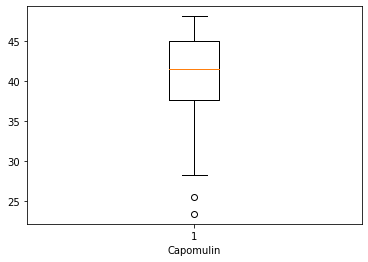

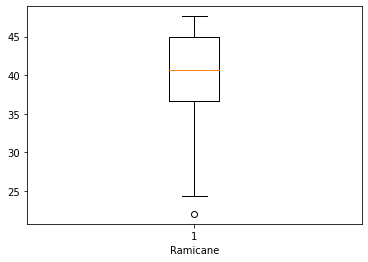

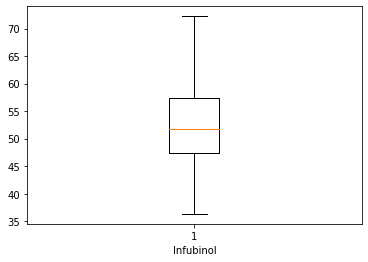

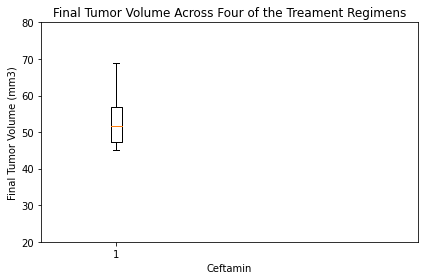

In [39]:
#NOTE:  
# x_axis = treatment_list
# y_axis = tumor_vol_list ==> Final Tumor Volume(mm3)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#tumor_vol_list = Capomulin_tum_vol
#tumor_vol_list = Ramicane_tum_vol
#tumor_vol_list = Infubinol_tum_vol
#tumor_vol_list = Ceftamin_tum_vol

#Capomulin_df.plot.box()
#Ramicane_df.plot.box()
#Infubinol_df.plot.box()
#Ceftamin_df.plot.box()

x_axis = treatment_list
y_axis = tumor_vol_list

# Setting up the plot
fig, ax = plt.subplots()
ax.boxplot(Capomulin_tum_vol)
ax.set_xlabel("Capomulin")

fig, ax = plt.subplots()
ax.boxplot(Ramicane_tum_vol)
ax.set_xlabel("Ramicane")

fig, ax = plt.subplots()
ax.boxplot(Infubinol_tum_vol)
ax.set_xlabel("Infubinol")

fig, ax = plt.subplots()
ax.boxplot(Ceftamin_tum_vol)
ax.set_xlabel("Ceftamin")

#ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(treatment_list) + 1)
ax.set_ylim(20,80)

ax.set_title('Final Tumor Volume Across Four of the Treament Regimens')
#ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.tight_layout()

plt.show()

#smaller bars are better

# Line and Scatter Plots

### Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [40]:
# for reference
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

drug_tumor_timept_df = clean_df[['Drug Regimen', 'Mouse ID', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)']]
drug_tumor_timept_df

,Drug Regimen,Mouse ID,Weight (g),Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,16,0,45.000000
1,Ramicane,k403,16,5,38.825898
2,Ramicane,k403,16,10,35.014271
3,Ramicane,k403,16,15,34.223992
4,Ramicane,k403,16,20,32.997729
...,...,...,...,...,...
1888,Naftisol,z969,30,25,63.145652
1889,Naftisol,z969,30,30,65.841013
1890,Naftisol,z969,30,35,69.176246
1891,Naftisol,z969,30,40,70.314904


In [42]:
Capomulin_only_tumor_timept_df = drug_tumor_timept_df[drug_tumor_timept_df['Drug Regimen'] == 'Capomulin']
Capomulin_only_tumor_timept_df

,Drug Regimen,Mouse ID,Weight (g),Timepoint,Tumor Volume (mm3)
10,Capomulin,s185,17,0,45.000000
11,Capomulin,s185,17,5,43.878496
12,Capomulin,s185,17,10,37.614948
13,Capomulin,s185,17,15,38.177232
14,Capomulin,s185,17,20,36.866876
...,...,...,...,...,...
440,Capomulin,i557,24,45,47.685963
1452,Capomulin,r157,25,0,45.000000
1453,Capomulin,r157,25,5,45.597064
1454,Capomulin,r157,25,10,46.059608


In [43]:
Capomulin_only_mouse_l509_df = drug_tumor_timept_df[(drug_tumor_timept_df['Mouse ID'] == 'l509')]
Capomulin_only_mouse_l509_df

,Drug Regimen,Mouse ID,Weight (g),Timepoint,Tumor Volume (mm3)
371,Capomulin,l509,21,0,45.000000
372,Capomulin,l509,21,5,45.851193
373,Capomulin,l509,21,10,46.759074
374,Capomulin,l509,21,15,47.488599
375,Capomulin,l509,21,20,48.070452
376,Capomulin,l509,21,25,44.006257
377,Capomulin,l509,21,30,44.708055
378,Capomulin,l509,21,35,40.207289
379,Capomulin,l509,21,40,40.770813
380,Capomulin,l509,21,45,41.483008


In [44]:
timepoint = Capomulin_only_mouse_l509_df['Timepoint']
timepoint

371     0
372     5
373    10
374    15
375    20
376    25
377    30
378    35
379    40
380    45
Name: Timepoint, dtype: int64

In [45]:
tumor_vol = Capomulin_only_mouse_l509_df['Tumor Volume (mm3)']
tumor_vol

371    45.000000
372    45.851193
373    46.759074
374    47.488599
375    48.070452
376    44.006257
377    44.708055
378    40.207289
379    40.770813
380    41.483008
Name: Tumor Volume (mm3), dtype: float64

In [46]:
#plt.figure()
#plt.plot(timepoint, tumor_vol)

## Line plot of tumor volume vs. time point for Mouse l509 treated with Capomulin

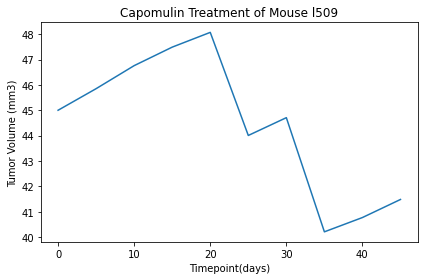

In [47]:
plt.close()

plt.plot(timepoint, tumor_vol)

# Set a Title and labels
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")
plt.show()

## Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [48]:
# extract Capomulin only
Capomulin_only = clean_df[(clean_df['Drug Regimen'] == 'Capomulin')]
Capomulin_only

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [49]:
Capomulin_weight_tumor_vol = Capomulin_only.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
Capomulin_weight_tumor_vol.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [50]:
Capomulin_weight = Capomulin_weight_tumor_vol['Weight (g)']
Capomulin_weight.head()

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
Name: Weight (g), dtype: int64

In [51]:
Capomulin_t_vol = Capomulin_weight_tumor_vol['Tumor Volume (mm3)']
Capomulin_t_vol.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

## Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen¶

In [52]:
# Get the maximum value for the x_limit
min_weight = Capomulin_weight.min()
min_weight

15

In [53]:
max_weight = Capomulin_weight.max()
max_weight

25

In [54]:
# Get the minimum & maximum value for the y_limit
min_tumor_vol = Capomulin_t_vol.min()
min_tumor_vol

34.559143395

In [55]:
max_tumor_vol = Capomulin_t_vol.max()
max_tumor_vol

45.798969507500004

## Scatter Plot

<IPython.core.display.Javascript object>


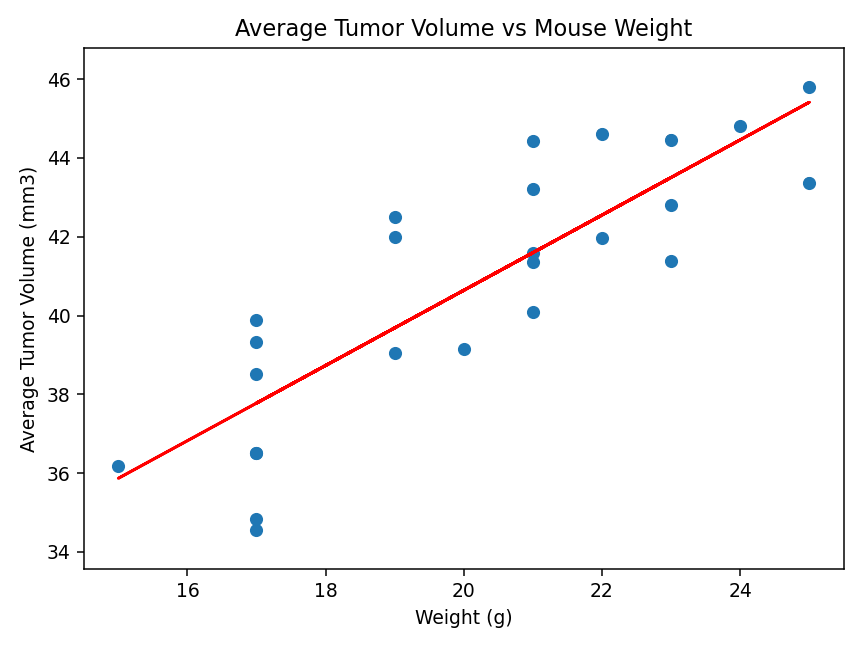

In [56]:
# enable matplotlib so that the correlation / regression line can be drawn over the scatter plot

%matplotlib notebook 

#----------------------------------------------
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
#----------------------------------------------

# The maximum x value for our chart will be 25
x_limit = max_weight

# List of values from 15 to 25 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 2)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

data = Capomulin_t_vol

# Tells matplotlib to create a scatter plot
# The size of each point on our plot is determined by their x value

plt.scatter(Capomulin_weight_tumor_vol['Weight (g)'], Capomulin_weight_tumor_vol['Tumor Volume (mm3)'], 
            marker="o", facecolors="red", edgecolors="black", s=Capomulin_weight, alpha=0.75)

# The x limits of our scatter plot is 15 to 25
plt.xlim(min_weight-0.5, max_weight+0.5)   

# The y limits of our scatter plot is 34 to 46
plt.ylim(min_tumor_vol-1, max_tumor_vol+1)

# Set a Title and labels
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# tigh_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")
plt.show()

#plt.close  

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [58]:
mouse_weight = Capomulin_weight_tumor_vol['Weight (g)']
tumor_volume = Capomulin_weight_tumor_vol['Tumor Volume (mm3)']

correlation = st.pearsonr(mouse_weight, tumor_volume)
correlation

(0.8419363424694717, 1.322572243471279e-07)

## Scatter Plot -- Line

In [59]:
# Add the linear regression equation and line to plot
x_values = Capomulin_weight_tumor_vol['Weight (g)']
y_values = Capomulin_weight_tumor_vol['Tumor Volume (mm3)']

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [61]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
plt.close 

<function matplotlib.pyplot.close(fig=None)>